Complete LinearRegression Implementation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('./CleanedDataset.csv')
df=df.drop(columns=['Unnamed: 0'],axis=1)
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [3]:
x=df.drop('FWI',axis=1)
y=df['FWI']

In [4]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=40,test_size=0.45)


In [5]:
xtrain.shape,xtest.shape

((133, 11), (110, 11))

In [6]:
xtrain.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.684617,-0.295558,-0.352039,0.703986,0.527805,0.433122,0.628283,0.503174,0.576303,0.242747
RH,-0.684617,1.000000,0.205990,0.282138,-0.739001,-0.443059,-0.231566,-0.755216,-0.370972,-0.557428,-0.435255
Ws,-0.295558,0.205990,1.000000,0.306686,-0.215302,-0.011389,0.042017,-0.027214,0.011483,-0.091108,-0.124093
Rain,-0.352039,0.282138,0.306686,1.000000,-0.511298,-0.302056,-0.313153,-0.353617,-0.312079,-0.373376,-0.075323
FFMC,0.703986,-0.739001,-0.215302,-0.511298,1.000000,0.637381,0.534819,0.754445,0.620850,0.788766,0.239305
DMC,0.527805,-0.443059,-0.011389,-0.302056,0.637381,1.000000,0.893792,0.688952,0.982105,0.614953,0.169665
DC,0.433122,-0.231566,0.042017,-0.313153,0.534819,0.893792,1.000000,0.492953,0.949699,0.522108,-0.071374
ISI,0.628283,-0.755216,-0.027214,-0.353617,0.754445,0.688952,0.492953,1.000000,0.641632,0.777802,0.331624
BUI,0.503174,-0.370972,0.011483,-0.312079,0.620850,0.982105,0.949699,0.641632,1.000000,0.612239,0.068560
Classes,0.576303,-0.557428,-0.091108,-0.373376,0.788766,0.614953,0.522108,0.777802,0.612239,1.000000,0.222072


In [7]:
def Colinearity(dataset,threshhold):
    col=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshhold:
                colname=corr_matrix.columns[i]
                col.add(colname)
    return col

In [8]:
corrFeature=Colinearity(xtrain,0.85)
corrFeature

{'BUI', 'DC'}

In [9]:
#Drop features when corr > 0.85
xtrain.drop(corrFeature,axis=1,inplace=True)
xtest.drop(corrFeature,axis=1,inplace=True)
xtrain.shape,xtest.shape

((133, 9), (110, 9))

Feature Scaling Or Standardization


In [10]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

xtrainScaled=scaler.fit_transform(xtrain)
xtestScaled=scaler.transform(xtest)

Box Plots To understand Effect Of Standard Scaler

<Axes: >

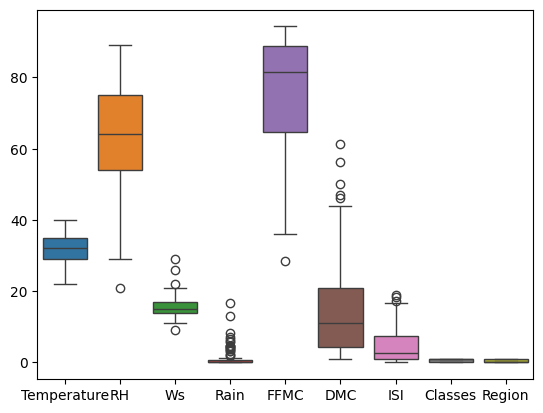

In [11]:
sns.boxplot(xtrain)

<Axes: >

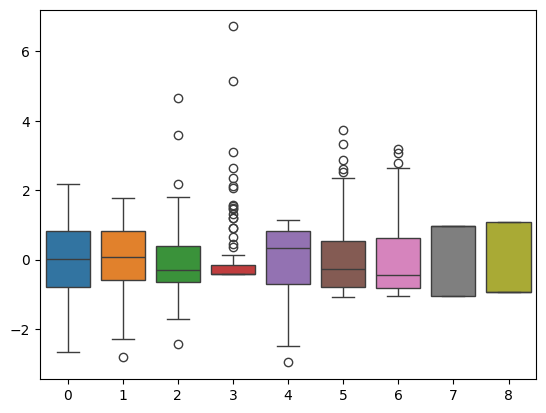

In [12]:
sns.boxplot(xtrainScaled)

Linear Regression Model 

In [13]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(xtrainScaled,ytrain)
ypred=model.predict(xtestScaled)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mae=mean_absolute_error(ytest,ypred)
r2score=r2_score(ytest,ypred)

print("MAE : ",mae*100)
print("r2Score : ",r2score*100)



MAE :  76.45187390605935
r2Score :  97.7769463733054


Lasso Regression


In [14]:
#Lasso Regression
from sklearn.linear_model import Lasso

model=Lasso()

model.fit(xtrainScaled,ytrain)
ypred=model.predict(xtestScaled)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mae=mean_absolute_error(ytest,ypred)
r2score=r2_score(ytest,ypred)

print("MAE : ",mae)
print("r2Score : ",r2score*100)


MAE :  1.2834972924993173
r2Score :  94.5958047037437


Lasso Cross Validation


MSE Path :  [[68.55337803 50.99966901 43.81344838 75.48948796 60.73726251]
 [63.90740494 45.72443508 40.12417992 75.48948796 54.94135191]
 [57.54520818 41.11328127 36.85239277 68.49760561 48.24712857]
 [51.59297982 36.11563928 33.36910343 61.13865123 42.40139137]
 [45.34403583 31.52794438 29.58603614 52.83623675 37.29517535]
 [39.89382772 27.54054115 26.27525946 45.70630303 32.8336673 ]
 [35.13919702 24.07570058 23.37644604 39.58999637 28.93425064]
 [30.990509   21.06485553 20.8372358  34.34955851 25.52496722]
 [27.36937389 18.44869077 18.61200121 29.86557903 22.54322606]
 [24.20864666 16.1756293  16.66058078 26.03454492 19.9344284 ]
 [21.44877672 14.20050039 14.94915483 22.7667656  17.65103798]
 [19.03828174 12.48499755 13.44705041 19.98454575 15.65160241]
 [16.93233605 10.99484321 12.12791892 17.62057529 13.90011451]
 [15.09190669  9.70055697 10.96878238 15.616659   12.3650866 ]
 [13.48300199  8.57650726  9.94959815 13.92236451 11.01911125]
 [12.07570742  7.6004091   9.05288044 12.49

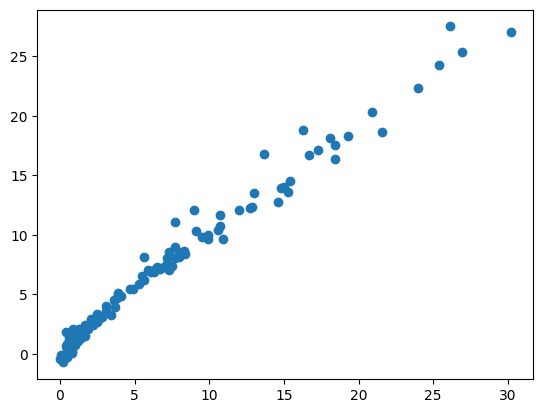

In [15]:
#Lasso Cross Validation Regression
from sklearn.linear_model import LassoCV

model=LassoCV(cv=5)

model.fit(xtrainScaled,ytrain)
ypred=model.predict(xtestScaled)

print("MSE Path : ",model.mse_path_)
print("alpha : ",model.alpha_)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mae=mean_absolute_error(ytest,ypred)
r2score=r2_score(ytest,ypred)

print("MAE : ",mae)
print("r2Score : ",r2score*100)

plt.scatter(ytest,ypred)


Ridge Regression

MAE :  0.7848237580385163
r2Score :  97.67962427083583


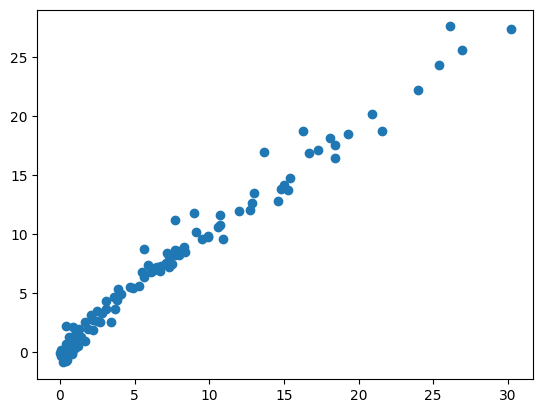

In [16]:
#Ridge Regression
from sklearn.linear_model import Ridge

model=Ridge()

model.fit(xtrainScaled,ytrain)
ypred=model.predict(xtestScaled)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mae=mean_absolute_error(ytest,ypred)
r2score=r2_score(ytest,ypred)

print("MAE : ",mae)
print("r2Score : ",r2score*100)

plt.scatter(ytest,ypred)


ElasticNet Regression

MAE :  2.0004193387911173
r2Score :  87.13879434133162


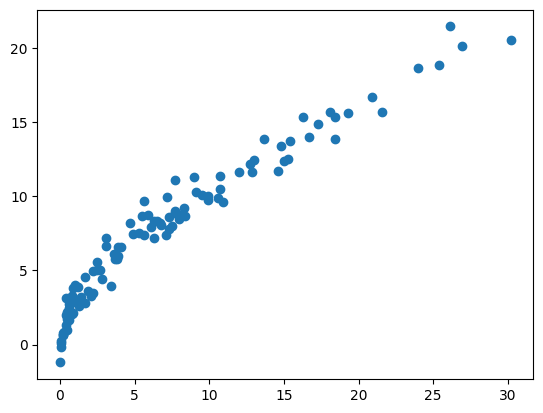

In [49]:
#ElasticNet Regression
from sklearn.linear_model import ElasticNet

model=ElasticNet()

model.fit(xtrainScaled,ytrain)
ypred=model.predict(xtestScaled)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mae=mean_absolute_error(ytest,ypred)
r2score=r2_score(ytest,ypred)

print("MAE : ",mae)
print("r2Score : ",r2score*100)

plt.scatter(ytest,ypred)
from sklearn.metrics import accuracy_score


Creating PipeLine for All Regression Algorithms

In [31]:
from sklearn.pipeline import Pipeline

steps=[
       ("Scaler",StandardScaler()),
       ("Linear",LinearRegression()),
       ]

pipe=Pipeline(steps)
pipe

Pipeline(steps=[('Scaler', StandardScaler()), ('Linear', LinearRegression())])

In [44]:
#Passing the Training DataSets to the PipeLine

pipe.fit(xtrain,ytrain)
pipe

Pipeline(steps=[('Scaler', StandardScaler()), ('Linear', LinearRegression())])

In [37]:
pipe.predict(xtest)

array([12.66295955,  9.50040146, -0.19004648,  4.62947227, -0.28516448,
        0.45087431,  2.50823048,  7.47389779, 12.06047894,  7.14630939,
       11.7272791 ,  2.26139296,  4.30253645, 27.75950122,  8.12409116,
        1.21033577, 17.13162315, 10.70028849, 11.9122835 ,  7.2102395 ,
        8.26343574,  0.06748911,  5.41260578,  6.9366384 ,  2.49131052,
        0.49972541, 13.45407648,  8.6362354 ,  1.17858512,  6.79527993,
       -0.8001074 ,  9.77496607,  4.14486447,  0.27545908,  7.23218468,
        0.29264117,  0.4275626 ,  3.39913444,  0.86017809, 11.62694472,
        2.04207249, 25.73472971,  5.46896338,  2.58672904,  6.7701653 ,
        3.52653332,  7.36556983,  0.67955358, 14.17541842, 16.50520838,
       24.52954525, -0.05957704,  1.86680584, 18.83539789,  9.69549388,
       -0.26403098,  0.03592345, 13.80628475,  0.23920592,  3.21562885,
        1.35730002, 17.64588478, -0.35985119, 18.81654481,  8.70525709,
        5.27047424, -0.15481668, -0.90562917, 27.57514661,  7.05

Testing Multiple Models

In [66]:
modelclasses=[
    ["Linear",LinearRegression],
    ["Ridge",Ridge],
    ["Lasso",Lasso],
    ["ElasticNet",ElasticNet],
]
scores=[]
for modelname,Model in modelclasses:
        
        model=Model()
        model.fit(xtrainScaled,ytrain)
        ypred=model.predict(xtestScaled)
        r2score=r2_score(ytest,ypred)

        scores.append((modelname,r2score*100))


for mname,score in scores:
        print("{} : {:.2f}".format(mname,score))

Linear : 97.78
Ridge : 97.68
Lasso : 94.60
ElasticNet : 87.14


Final Report

Linear Regression model has the Highest r2 score of 97.78 following that Ridge Model has 97.68

@sureshkrishnan
